# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


test


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    print(fitnesses)
    return obs_preds,opt,target,hall_of_fame,cell_evaluator


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


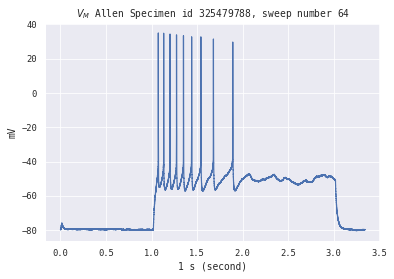

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen 325479788

In [4]:
efel_filter_iterable = [
    "Spikecount",
    "ISI_log_slope",    
    "ISI_CV",
    "peak_voltage"]
obs_preds,opt,target,hall_of_fame,cell_evaluator = test_opt_relative_diff(specimen_id = 325479788,
                                                                          model_type="ADEXP",
                                                                          efel_filter_iterable=efel_filter_iterable)


gen	nevals	avg    	std    	min    	max  
1  	55    	3579.65	5665.69	6.29892	13000


2  	50    	3142.32	5375.61	4.68266	13000
3  	21    	929.524	3199.42	4.68266	13000
4  	22    	571.999	2649.66	4.44294	13000
5  	21    	636.439	2647.42	4.44294	13000
6  	20    	309.641	1897.38	4.27987	13000
7  	20    	5.30262	1.07967	4.27987	9.66191
8  	22    	5.74336	1.96382	3.94198	13.4015
9  	18    	288.869	1894.87	3.94198	13000  
10 	19    	4.78215	0.728935	3.94198	7.48433
11 	22    	27.0885	145.895 	3.94198	1005.75
12 	18    	48.553 	204.077 	3.94198	1005.75
13 	20    	4.85321	0.705423	1.93289	6.24407
14 	21    	287.353	1895.09 	1.29197	13000  
15 	19    	873.433	3206.38 	1.29197	13000  
16 	19    	590.054	2649.82 	1.29197	13000  
17 	20    	2024.07	4654.48 	1.29197	13000  
18 	18    	1719.27	4371.43 	1.29197	13000  
19 	19    	1414.45	4045.85 	1.29197	13000  
20 	18    	45.888 	204.5   	1.29197	1005.64
21 	15    	893.818	3204.14 	1.29197	13000  
22 	18    	284.123	1895.57 	1.29197	13000  
23 	16    	305.681	1897.98 	1.29197	13000  
24 	18    	1153.64	3658.79 	1.29197	13000  
25 	16


[41.07822391967081, 1.0293832646957908, -71.68940604629864, -42.00611213751985, 35.78028705728246, 0.026242741474065173, 0.5338076597001644, -50.48477490548417, 117.2942825335357, 6.191058715700168] the gene
1.1544866522514312


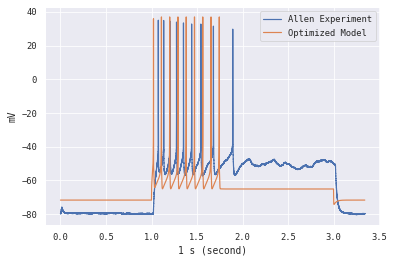

In [5]:

check_bin_vm_soma(target,opt)

In [8]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,Spikecount,9.000000,9.000000,Relative Difference = 0.00
1,ISI_log_slope,0.485704,0.000085,Relative Difference = 0.49
2,ISI_CV,0.476055,0.000589,Relative Difference = 0.48
3,peak_voltage,33.027779,33.057239,Relative Difference = 0.03
4,spike_0,1.074385,1.021250,Relative Difference = 0.05
5,spike_1,1.133280,1.109000,Relative Difference = 0.02
6,spike_2,1.203080,1.199750,Relative Difference = 0.00
7,spike_3,1.274420,1.290500,Relative Difference = 0.02
8,spike_4,1.350750,1.381250,Relative Difference = 0.03
9,spike_5,1.440345,1.472000,Relative Difference = 0.03


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

In [9]:

opt.seeded_current

array(92.53890991) * pA

In [10]:
target_current = {'value':opt.seeded_current}
import numpy as np
from neuronunit.optimization.optimization_management import inject_model_soma
_, _, _, _, opt = inject_model_soma(opt, solve_for_current=target_current["value"])
np.max(opt.vm_soma)
print(opt.spk_count)

9.0


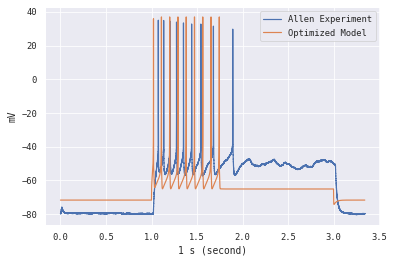

In [11]:
check_bin_vm_soma(target,opt)

In [12]:
observation_range = {}
observation_range["value"] = opt.spk_count
from neuronunit.tests.target_spike_current import SpikeCountSearch
#
scs = SpikeCountSearch(observation_range)
target_current = scs.generate_prediction(opt.dtc_to_model())

opt.solve_for_current# = target_current["value"]

array(255.22966008) * pA

In [13]:
best_ind = hall_of_fame[0]
fitnesses = cell_evaluator.evaluate_with_lists(best_ind)


In [14]:
#cell_evaluator.cell_model.attrs
opt.attrs = {
        str(k): float(v) for k, v in cell_evaluator.param_dict(best_ind).items()
    }

In [15]:
observation_range = {}
observation_range["value"] = opt.spk_count
from neuronunit.tests.target_spike_current import SpikeCountSearch

scs = SpikeCountSearch(observation_range)
print(opt.attrs)
#opt.attrs = cell_evaluator.cell_model.attrs
target_current = scs.generate_prediction(opt.dtc_to_model())
opt.solve_for_current = target_current["value"]
print(target_current)
print(opt.attrs)


{'C': 41.07822391967081, 'k': 1.0293832646957908, 'vr': -71.68940604629864, 'vt': -42.00611213751985, 'vPeak': 35.78028705728246, 'a': 0.026242741474065173, 'b': 0.5338076597001644, 'c': -50.48477490548417, 'd': 117.2942825335357, 'celltype': 6.191058715700168}
{'value': array(255.22966008) * pA}
{'C': 41.07822391967081, 'k': 1.0293832646957908, 'vr': -71.68940604629864, 'vt': -42.00611213751985, 'vPeak': 35.78028705728246, 'a': 0.026242741474065173, 'b': 0.5338076597001644, 'c': -50.48477490548417, 'd': 117.2942825335357, 'celltype': 6.191058715700168}


{'C': 41.07822391967081, 'k': 1.0293832646957908, 'vr': -71.68940604629864, 'vt': -42.00611213751985, 'vPeak': 35.78028705728246, 'a': 0.026242741474065173, 'b': 0.5338076597001644, 'c': -50.48477490548417, 'd': 117.2942825335357, 'celltype': 6.191058715700168}


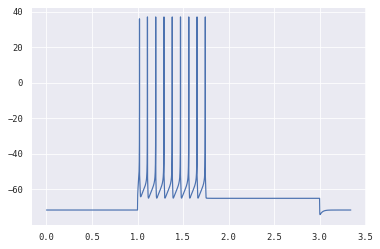

In [16]:
#check_bin_vm_soma(target,opt)
ALLEN_DELAY = 1000.0 * pq.ms
ALLEN_DURATION = 2000.0 * pq.ms
uc = {
    "amplitude": target_current["value"],
    "duration": ALLEN_DURATION,
    "delay": ALLEN_DELAY,
    "padding":342.85* pq.ms
}
#model = dtc.dtc_to_model()
#temp = model.attrs
model = opt.dtc_to_model()
print(model.attrs)
model.inject_square_current(**uc)
n_spikes = model.get_spike_count()
vm_soma = model.get_membrane_potential()
opt.vm_soma = vm_soma

plt.plot(vm_soma.times,vm_soma)